# Data Loader

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("splcher/animefacedataset")

print("Path to dataset files:", path)

Path to dataset files: /home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3


2025-03-14 01:03:11.783355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741896191.808298   52558 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741896191.815811   52558 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1741896191.836207   52558 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741896191.836223   52558 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741896191.836225   52558 computation_placer.cc:177] computation placer alr

No GPU found. Using CPU.


2025-03-14 01:03:14.335934: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


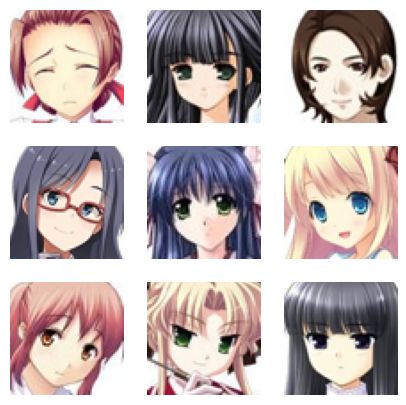

In [3]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Using GPU:", gpus)
else:
    print("No GPU found. Using CPU.")

# Path to dataset
dataset_path = "/home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3/images"

# Ensure dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

# Image processing settings
IMG_SIZE = 64  # Standard size for DCGAN
BATCH_SIZE = 32  # Process images in batches

# Function to load and preprocess images
def process_image(filename):
    img = Image.open(filename).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype(np.float32)
    img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
    return img

# Create TensorFlow Dataset
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
dataset = tf.data.Dataset.from_tensor_slices(image_files)

# Load images lazily (on-demand)
dataset = dataset.map(lambda x: tf.numpy_function(process_image, [x], tf.float32), num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Convert dataset into an iterator
iterator = iter(dataset)
batch = next(iterator)

# Display sample images
plt.figure(figsize=(5, 5))
for i in range(min(9, batch.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow((batch[i] * 127.5 + 127.5).numpy().astype(np.uint8))  # Convert back to [0, 255]
    plt.axis("off")
plt.show()


In [ ]:



'''

import os
import numpy as np
import tensorflow as tf
from PIL import Image

# Path to your dataset
dataset_path = "/home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3/images"

# Get all image file names
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Image processing settings
IMG_SIZE = 64  # DCGAN usually uses 64x64 images

# Load images, resize, and normalize
image_data = []
for file in image_files:
    img = Image.open(os.path.join(dataset_path, file)).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype(np.float32)  # Convert to float32
    img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
    image_data.append(img)

# Convert list to NumPy array
image_data = np.array(image_data)

# Convert to TensorFlow tensor and force CPU placement
with tf.device('/CPU:0'):
    image_data_cpu = tf.convert_to_tensor(image_data, dtype=tf.float32)

print(f"Saved {image_data.shape[0]} images in CPU memory")
print("Tensor is stored on:", image_data_cpu.device)  # Should print "/CPU:0"
'''

I0000 00:00:1741817419.282989   11392 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:02:00.0, compute capability: 8.9


Saved 63565 images in CPU memory
Tensor is stored on: /job:localhost/replica:0/task:0/device:CPU:0


2025-03-13 03:11:09.693746: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3124346880 exceeds 10% of free system memory.


2025-03-13 03:14:30.488192: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2499477504 exceeds 10% of free system memory.
2025-03-13 03:14:49.153401: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 624869376 exceeds 10% of free system memory.


Train shape: (50852, 64, 64, 3)
Test shape: (12713, 64, 64, 3)
x_train_tensor is stored on: /job:localhost/replica:0/task:0/device:CPU:0
x_test_tensor is stored on: /job:localhost/replica:0/task:0/device:CPU:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with R

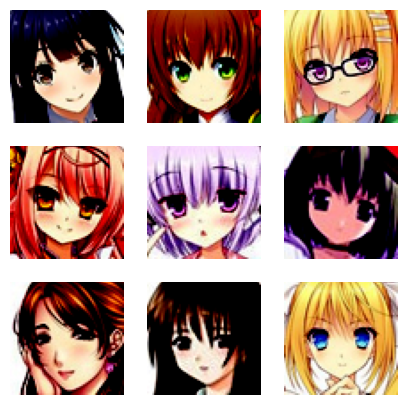

In [ ]:
''''
'import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset
image_data = np.load("anime_faces_dcgan.npy")

# Split into train and test (optional)
trainX, testX = train_test_split(image_data, test_size=0.2, random_state=42)

# Convert NumPy arrays to TensorFlow tensors and force CPU placement
with tf.device('/CPU:0'):
    x_train_tensor = tf.convert_to_tensor(trainX, dtype=tf.float32)
    x_test_tensor = tf.convert_to_tensor(testX, dtype=tf.float32)

print("Train shape:", trainX.shape)
print("Test shape:", testX.shape)

# Check device placement
print("x_train_tensor is stored on:", x_train_tensor.device)  # Should print "/CPU:0"
print("x_test_tensor is stored on:", x_test_tensor.device)    # Should print "/CPU:0"

# Plot some images (still CPU-based)
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow((trainX[i] ))  # Convert back to [0, 255] range for display
    plt.axis("off")
plt.show()
'''

(32, 100)


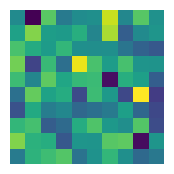

In [4]:
from tensorflow.keras import layers

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model

def generate_noise(z_dim,batch_size):
    noise = tf.random.normal(shape=(batch_size,z_dim))
    print(noise.shape)
    return noise 
import matplotlib.pyplot as plt
batch = generate_noise(100,32)
for i in range(1):  
    plt.figure(figsize=(2, 2))
    plt.imshow(batch[i].numpy().reshape(10,10)) 
    plt.axis('off')  
    plt.show()

/home/kifal/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │       819,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 4, 4, 512)      │     6,553,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 8, 8, 256)      │     3,276,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 128)    │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 64)     │        73,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 3)      │         1,728 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,580,864 (44.18 MB)

 Trainable params: 11,562,560 (44.11 MB)

 Non-trainable params: 18,304 (71.50 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


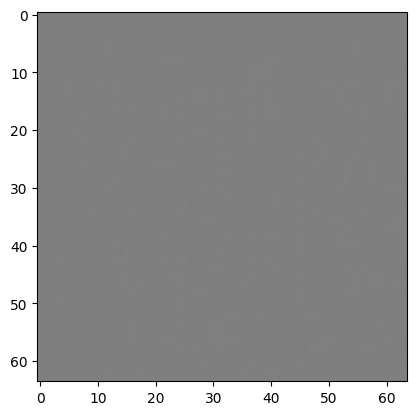

In [5]:
def build_generator():
    model=tf.keras.Sequential()
    model.add(layers.Dense(4*4*512,use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4,4,512)))
    
    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', use_bias=False,activation='tanh'))
    model.summary()
    
    return model




generator = build_generator()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow((generated_image[0] + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
plottingmodel = tf.keras.utils.plot_model(
    model=generator,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=False,
    show_trainable=False,
    )

In [11]:
def build_discriminator():
    model= tf.keras.Sequential()
    model.add(layers.Conv2D(128 , kernel_size=(5,5) , strides=(2,2) , padding='same' ,  input_shape=[64,64, 1] ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256 , kernel_size=(5,5) , strides=(2,2) , padding='same' ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(512 , kernel_size=(5,5) , strides=(2,2) , padding='same' ,  input_shape=[64,64, 1] ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.summary()
    return model


discriminator=build_discriminator()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,132,865 (15.77 MB)

 Trainable params: 4,132,865 (15.77 MB)

 Non-trainable params: 0 (0.00 B)